In [19]:
using Plots, Printf
pyplot()

Plots.PyPlotBackend()

In [20]:
f(x1,x2) = (1 - x1)^2 + 5*(x2 - x1^2)^2
∇f(x1,x2) = [2*(10*x1^3-10*x1*x2+x1-1), 10*(x2-x1^2)]

∇f (generic function with 1 method)

In [21]:
xdomain = -2.0:0.1:2.0
ydomain = -2.0:0.1:2.0

-2.0:0.1:2.0

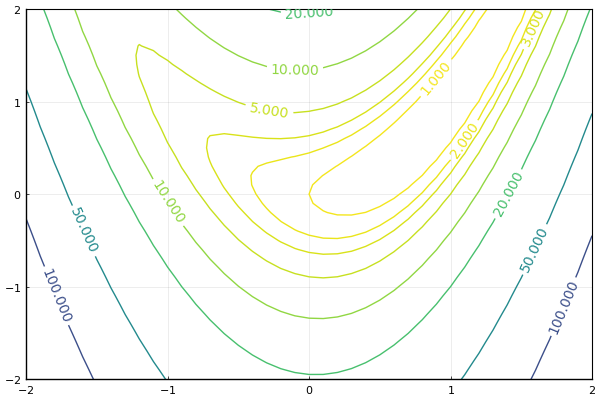

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [22]:
pl1 = contour(xdomain, ydomain, f, 
    levels=[1,2,3,5,10,20,50,100], 
    legend = false,
    framestyle = :box,
    contour_labels = true,
    c = cgrad(:viridis, rev = true, scale = :exp))

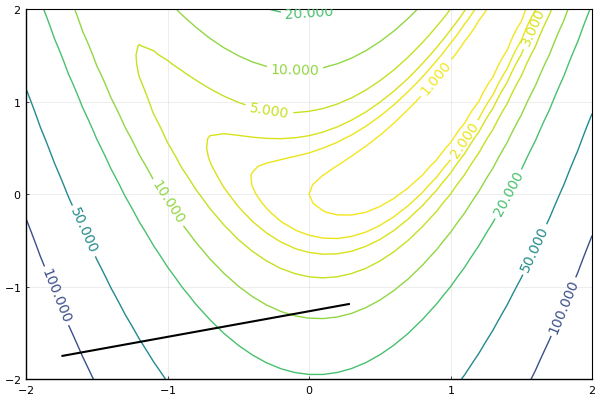

In [23]:
x = [-1.75,-1.75]

p = 0.5
β = 1e-4
α_max = 6.0

# Descent direction
d = -∇f(x[1],x[2])
α = α_max

y, g = f(x[1],x[2]), ∇f(x[1],x[2])

# Check first Wolfe condition (sufficient condition)
while f((x[1] + α*d[1]), (x[2] + α*d[2])) ≥ y + β*α*(g'*d)
    xn = x + d*α
    if -2 ≤ xn[1] ≤ 2 && -2 ≤ xn[2] ≤ 2
        scatter!([x[1] + d[1]*α], [x[2] + d[2]*α])    
    end
    α *= p
end
xn = x + d*α
plot!([x[1], xn[1]], [x[2], xn[2]], label="", xlims = (-2,2), ylims = (-2,2), lc = :black, lw = 1.5)

In [24]:
xn

2-element Array{Float64,1}:
  0.288330078125
 -1.18603515625

In [25]:
ϵ = 10
iters = 0

@time while ϵ > 0.0000001
    x = xn
    p = 0.5
    β = 1e-4
    α_max = 6.0

    # Descent direction
    d = -∇f(x[1],x[2])
    α = α_max

    y, g = f(x[1],x[2]), ∇f(x[1],x[2])

    # Check first Wolfe condition (sufficient condition)
    while f((x[1] + α*d[1]), (x[2] + α*d[2])) ≥ y + β*α*(g'*d)
        xn = x + d*α
        α *= p
    end
    xn = x + d*α
    ϵ = abs(f(x[1],x[2]) - f(xn[1],xn[2]))
    iters += 1
    plot!([x[1], xn[1]], [x[2], xn[2]], label="", xlims = (-2,2), ylims = (-2,2))
end
println("Iter = ", iters)

  0.106383 seconds (370.20 k allocations: 19.126 MiB, 30.74% gc time)
Iter = 142


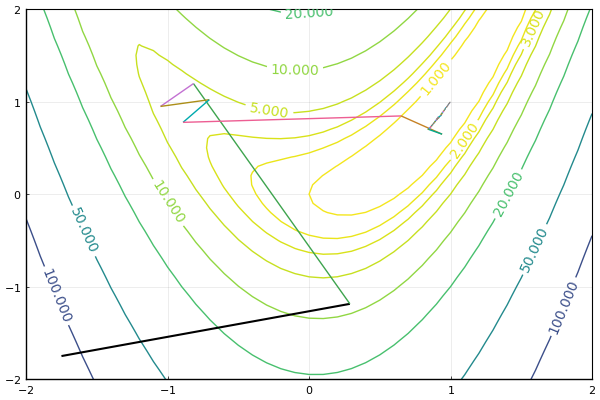

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [16]:
plot(pl1)

In [17]:
x

2-element Array{Float64,1}:
 0.9963373458482568
 0.9926975101629824